In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm


In [13]:
measures = pd.read_csv("measures.csv")

# Summary stats

In [3]:
len(measures)

8634

In [4]:
measures

,tta_or_condition,d_condition,tta_condition,is_gap_accepted,RT,subj_id,dwell_time,decision
0,4,20,4,True,1.195,3,0.826087,Merge
1,4,20,4,True,1.175,3,0.739130,Merge
2,4,20,4,True,1.865,3,0.621622,Merge
3,4,20,4,True,0.923,3,1.000000,Merge
4,4,20,4,True,1.335,3,0.846154,Merge
...,...,...,...,...,...,...,...,...
8629,6,40,6,False,2.433,24,0.541667,Wait
8630,6,40,6,False,2.185,24,0.813953,Wait
8631,6,40,6,False,1.199,24,0.869565,Wait
8632,6,40,6,False,1.571,24,0.677419,Wait


<AxesSubplot:>

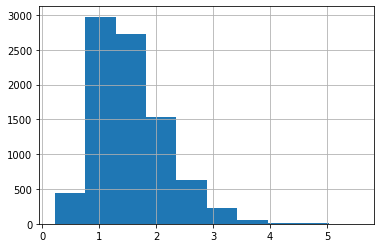

In [5]:
measures.RT.hist()

In [15]:
len(measures[measures.RT<4])/len(measures)

0.9959462589761409

In [16]:
measures = measures[measures.RT<4]

<AxesSubplot:>

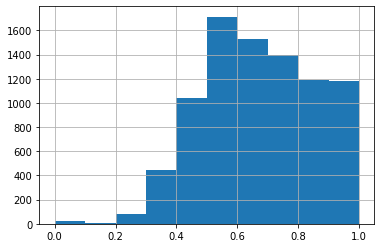

In [17]:
measures.dwell_time.hist()

In [18]:
measures.groupby("subj_id").is_gap_accepted.mean().sort_values()

subj_id
21    0.300000
5     0.352941
24    0.461111
14    0.461318
12    0.511111
16    0.538889
25    0.578212
19    0.588889
17    0.589888
9     0.677966
13    0.686111
11    0.697222
15    0.702778
10    0.711111
26    0.729805
4     0.744444
22    0.747851
3     0.758333
18    0.777159
7     0.797222
6     0.800000
8     0.805556
23    0.852778
20    0.935754
Name: is_gap_accepted, dtype: float64

# Gap effects on decision and RTs

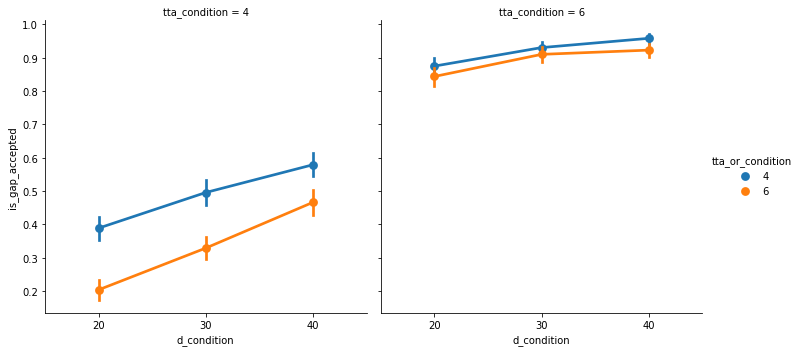

In [19]:
sns.catplot(data=measures, y="is_gap_accepted", x="d_condition", hue="tta_or_condition", col="tta_condition", kind="point")

- Distance and TTA increase p(accept): both are a part of the generalized gap
- TTA_onramp decreases p(accept), especially for smaller TTA: negatively contributes to evidence in favor of merging

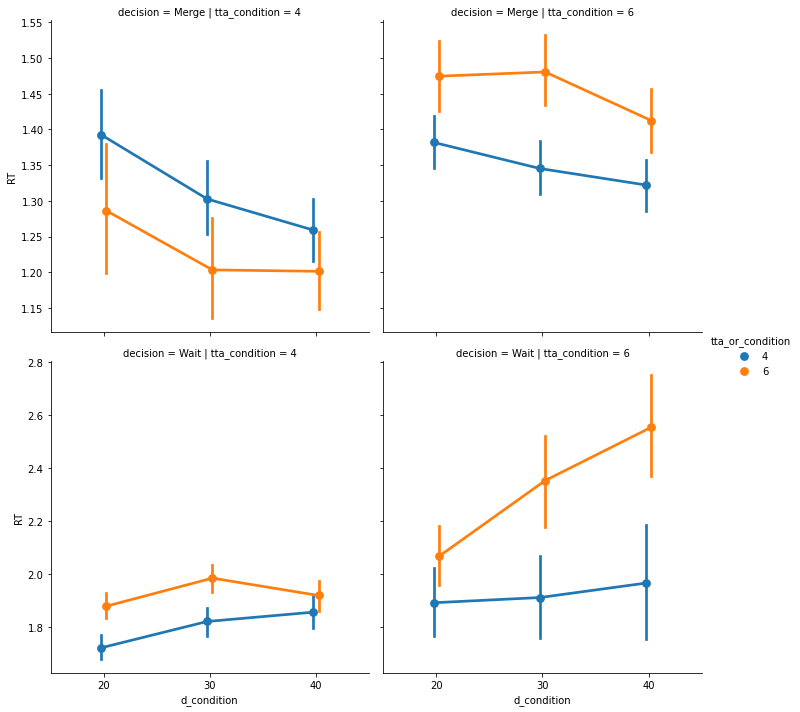

In [20]:
sns.catplot(data=measures, y="RT", x="d_condition", hue="tta_or_condition", col="tta_condition", row="decision", kind="point", sharey="row", dodge=True)

- Merge decisions are **much** faster than Wait decisions
    - see different y-axes scales in top vs bottom panels
- RT increases with TTA
    - In both Merge and Wait decisions, in all distance/TTA_onramp conditions, 6s TTA decisions are slower than in 4s TTA.
- Effect of TTA on RT is modulated by TTA_onramp
    - When on-ramp is close (4 seconds, blue lines), TTA doesn't have a very strong effect on RT
    - When the on-ramp is far (6 seconds, orange lines), RT changes a lot with TTA (compare orange lines in left and right panels, across distances)
- For Merge decisions, it's super interesting: decisions in TTA=4, TTA_onramp=4 are slower than TTA=4, TTA_onramp=6! How is that possible? In theory, 4,4 condition gives the highest time pressure, why is increasing TTA_onramp (that is, decreasing pressure) makes the Merge decisions even faster?
   - One possible explanation is related to different gaze patterns being potentially different
   - Another explanation could be related to interplay between evidence strength and time pressure
   - Evidence for Merge decision is weaker in 4,6 condition than in 4, 4 condition?
   - Time pressure is weaker in 4,6 condition than in 4, 4 condition

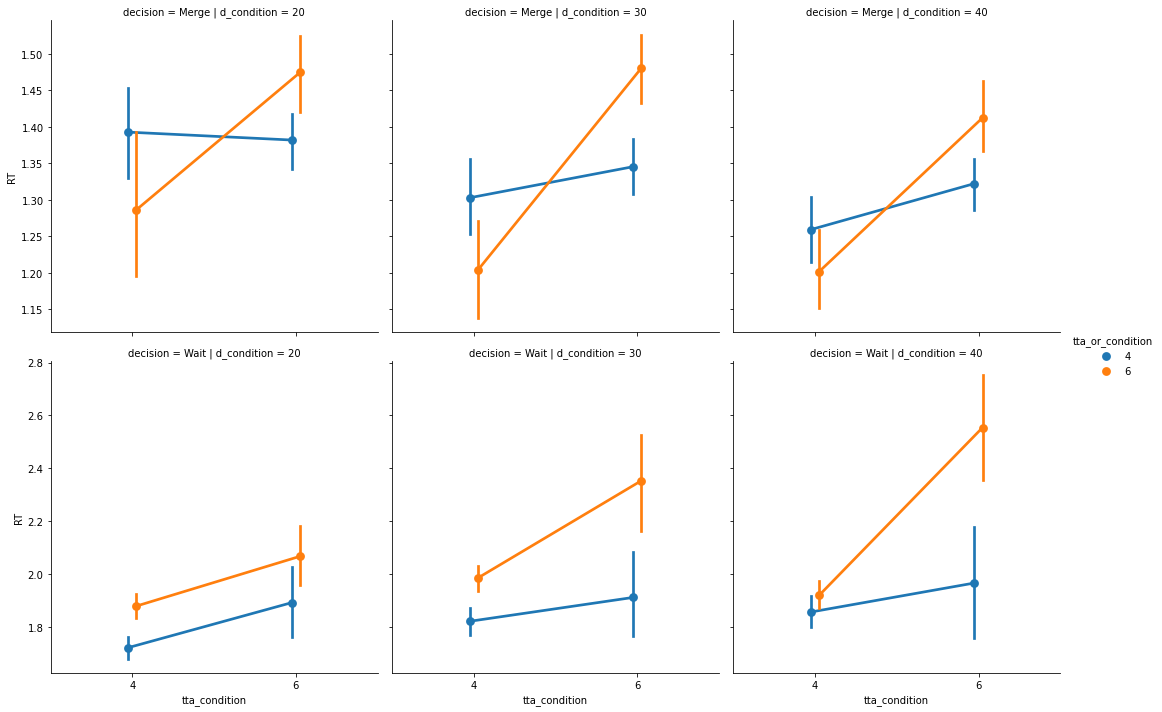

In [21]:
sns.catplot(data=measures, y="RT", col="d_condition", x="tta_condition", row="decision", hue="tta_or_condition", kind="point", sharey="row", dodge=True)

Conclusions



# Gaze effects

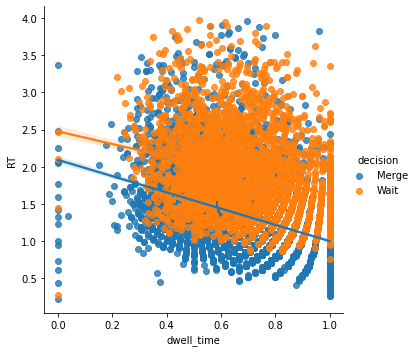

In [23]:
sns.lmplot(data=measures, x="dwell_time", y="RT", hue="decision")

## Gaze effect on decision

Overall effect is small-ish

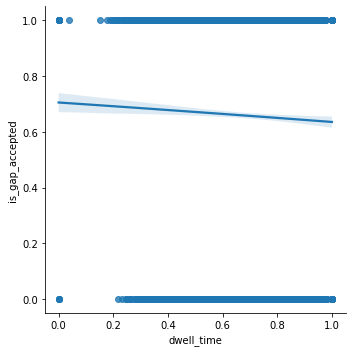

In [24]:
sns.lmplot(data=measures, x="dwell_time", y="is_gap_accepted", logistic=True)

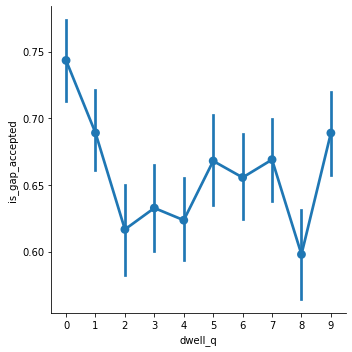

In [27]:
measures["dwell_q"] = pd.qcut(measures.dwell_time, 10, labels=False)
sns.catplot(data=measures, x="dwell_q", y="is_gap_accepted", kind="point")

However, depending on the condition, information in the mirror can represent evidence for or against the merge decision. So let's look at the same plots per condition.

In [28]:
measures.groupby(["d_condition", "tta_condition", "tta_or_condition"]).is_gap_accepted.mean().sort_values()

d_condition  tta_condition  tta_or_condition
20           4              6                   0.203911
30           4              6                   0.329114
20           4              4                   0.388889
40           4              6                   0.466387
30           4              4                   0.495833
40           4              4                   0.579167
20           6              6                   0.843882
                            4                   0.875000
30           6              6                   0.910238
40           6              6                   0.922969
30           6              4                   0.930556
40           6              4                   0.958333
Name: is_gap_accepted, dtype: float64

First, for conditions in which the drivers are unlikely to merge (**small gap**), the mirror contains information against the merge decision. Here we expect the probability of accepting the gap to **decrease** with dwell time to the mirror

C:\Users\azgonnikov\AppData\Local\Temp\ipykernel_8764\957419350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)


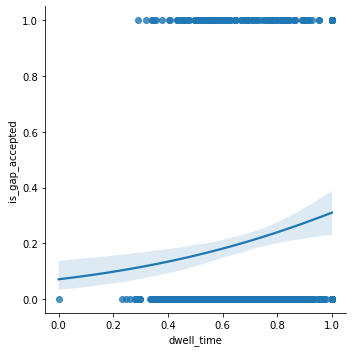

In [22]:
data = measures[(measures.d_condition==20)&(measures.tta_condition==4)&(measures.tta_or_condition==6)]
data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)

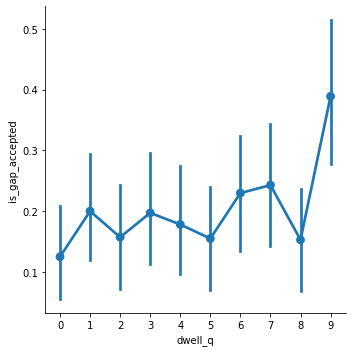

In [23]:
sns.catplot(data=data, x="dwell_q", y="is_gap_accepted", kind="point")

Second, for conditions in which the drivers are likely to merge (**gap is large**), the mirror contains information for the merge decision. In this case we expect the probability of accepting the gap to **increase** with dwell time

C:\Users\azgonnikov\AppData\Local\Temp\ipykernel_8764\3239129403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dwell_q"] = pd.qcut(data.dwell_time, 9, labels=False)


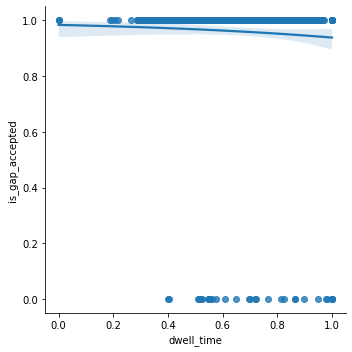

In [29]:
data = measures[(measures.d_condition==40)&(measures.tta_condition==6)&(measures.tta_or_condition==4)]
data["dwell_q"] = pd.qcut(data.dwell_time, 9, labels=False)
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)

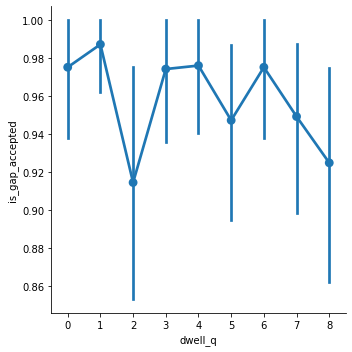

In [30]:
sns.catplot(data=data, x="dwell_q", y="is_gap_accepted", kind="point")

However, for clear-cut decisions (very big or very small gaps) there might not be enough room for the gaze duration to affect the already very clear decision. Let's look at the decisions that are second-best in terms of merge/wait probability

C:\Users\azgonnikov\AppData\Local\Temp\ipykernel_15560\1819337453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)


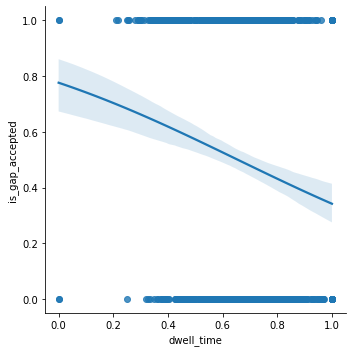

In [29]:
data = measures[(measures.d_condition==30)&(measures.tta_condition==4)&(measures.tta_or_condition==4)]
data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)

# Correlating gaps and effect of dwell time on decision

Optimization terminated successfully.
         Current function value: 0.495990
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        is_gap_accepted   No. Observations:                  720
Model:                          Logit   Df Residuals:                      718
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                 0.01634
Time:                        00:34:46   Log-Likelihood:                -357.11
converged:                       True   LL-Null:                       -363.05
Covariance Type:            nonrobust   LLR p-value:                 0.0005721
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5765      0.375     -6.865      0.000      -3.312      -1.841
x1             1.7757      0.

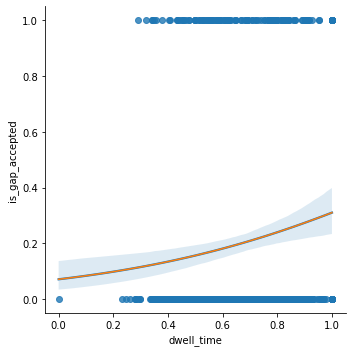

In [78]:
# data = measures
data = measures[(measures.d_condition==20)&(measures.tta_condition==4)&(measures.tta_or_condition==6)]
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)
# defining the dependent and independent variables
Xtrain = np.c_[np.ones(len(data.dwell_time)), data.dwell_time]
ytrain = data.is_gap_accepted

# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
# log_reg = sm.OLS(ytrain, Xtrain).fit()
# log_reg = sm.genmod.GLM(ytrain, Xtrain, family=sm.families.Binomial()).fit()
print(log_reg.summary())
pred_input = np.c_[np.ones(len(np.linspace(0,1,21))), np.linspace(0,1,21)]
predictions = log_reg.predict(pred_input)
plt.plot(pred_input[:,1], predictions, color="C1")

In [102]:
p_accept = measures.groupby(["d_condition", "tta_condition", "tta_or_condition"]).is_gap_accepted.mean()
mean_dwell_time = measures.groupby(["d_condition", "tta_condition", "tta_or_condition"]).dwell_time.mean()

In [123]:
def get_b(data):
    Xtrain = np.c_[np.ones(len(data.dwell_time)), data.dwell_time]
    ytrain = data.is_gap_accepted

    # building the model and fitting the data
    log_reg = sm.Logit(ytrain, Xtrain).fit()
    return pd.Series([log_reg.params[1], log_reg.pvalues[1]])
log_reg_coeffs = measures.groupby(["d_condition", "tta_condition", "tta_or_condition"]).apply(get_b)
log_reg_coeffs.columns=["b", "p"]

Optimization terminated successfully.
         Current function value: 0.657922
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.495990
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.372021
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.442952
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.677083
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.630868
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.250147
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316402
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.655713
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.689962
  

In [124]:
log_reg_coeffs

b             p
d_condition tta_condition tta_or_condition                        
20          4             4                -1.656133  1.455597e-04
                          6                 1.775726  6.623856e-04
            6             4                -1.550171  9.627607e-03
                          6                 0.722737  1.879180e-01
30          4             4                -1.898129  2.570777e-06
                          6                 0.528984  2.192469e-01
            6             4                -1.324240  8.787846e-02
                          6                -0.133991  8.449979e-01
40          4             4                -2.507506  6.294631e-09
                          6                -0.370687  3.699619e-01
            6             4                -1.375256  1.532591e-01
                          6                 0.817036  2.619695e-01

In [125]:
log_reg_coeffs = pd.concat([p_accept, log_reg_coeffs], axis=1)

In [126]:
log_reg_coeffs

is_gap_accepted         b  \
d_condition tta_condition tta_or_condition                              
20          4             4                        0.388889 -1.656133   
                          6                        0.202778  1.775726   
            6             4                        0.875000 -1.550171   
                          6                        0.837274  0.722737   
30          4             4                        0.495833 -1.898129   
                          6                        0.326843  0.528984   
            6             4                        0.930556 -1.324240   
                          6                        0.903900 -0.133991   
40          4             4                        0.579167 -2.507506   
                          6                        0.463788 -0.370687   
            6             4                        0.958333 -1.375256   
                          6                        0.919444  0.817036   

                                                       p  
d_condition tta_condition tta_or_condition                
20          4             4                 1.455597e-04  
                          6                 6.623856e-04  
            6             4                 9.627607e-03  
                          6                 1.879180e-01  
30          4             4                 2.570777e-06  
                          6                 2.192469e-01  
            6             4                 8.787846e-02  
                          6                 8.449979e-01  
40          4             4                 6.294631e-09  
                          6                 3.699619e-01  
            6             4                 1.532591e-01  
                          6                 2.619695e-01

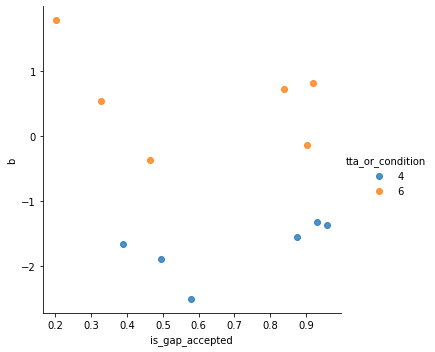

In [173]:
sns.lmplot(data=log_reg_coeffs.reset_index(), x="is_gap_accepted", y="b", hue="tta_or_condition", fit_reg=False)

<AxesSubplot:xlabel='is_gap_accepted', ylabel='b'>

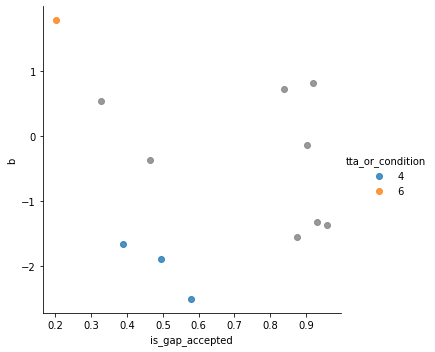

In [172]:
# including Bonferroni correction
sns.lmplot(data=log_reg_coeffs[log_reg_coeffs.p*len(log_reg_coeffs)<0.05].reset_index(), x="is_gap_accepted", y="b", hue="tta_or_condition", fit_reg=False)
ax=plt.gca()
sns.regplot(ax=ax, data=log_reg_coeffs[log_reg_coeffs.p*len(log_reg_coeffs)>0.05].reset_index(), x="is_gap_accepted", y="b", fit_reg=False, color="grey")

For most conditions (8 out of 12) the relationship between gap acceptance and dwell times is not significant.

C:\Users\azgonnikov\AppData\Local\Temp\ipykernel_15560\631696451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)


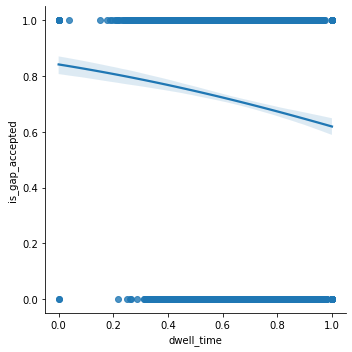

In [30]:
data = measures[(measures.tta_or_condition==4)]
data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)

C:\Users\azgonnikov\AppData\Local\Temp\ipykernel_15560\2314768972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)


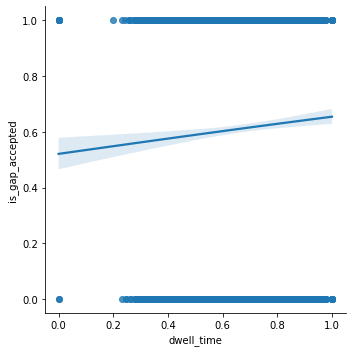

In [31]:
data = measures[(measures.tta_or_condition==6)]
data["dwell_q"] = pd.qcut(data.dwell_time, 10, labels=False)
sns.lmplot(data=data, x="dwell_time", y="is_gap_accepted", logistic=True)

# Dwell time as a function of gaps and decision

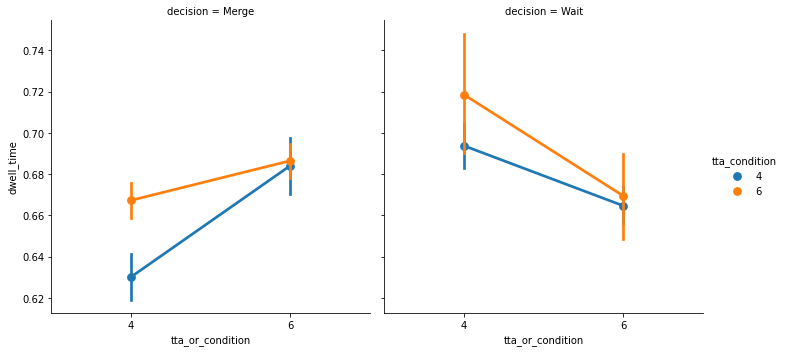

In [144]:
sns.catplot(data=measures, y="dwell_time", x="tta_or_condition", hue="tta_condition", col="decision", kind="point")

In [141]:
data = measures
Xtrain = np.c_[np.ones(len(measures.dwell_time)), data.tta_condition, data.d_condition, data.tta_or_condition, data.is_gap_accepted, data.RT]
ytrain = data.dwell_time

ols_reg = sm.OLS(ytrain, Xtrain).fit()

In [142]:
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             dwell_time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          3.68e-256
Time:                        13:05:11   Log-Likelihood:                 2792.5
No. Observations:                8634   AIC:                            -5573.
Df Residuals:                    8628   BIC:                            -5531.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7394      0.016     46.263      0.0

# Model exploration

In [335]:
def get_trace(t, dt, tta, d, tta_or, model_params, gaze_sample):
    noise = np.random.randn(len(t))

    drift = model_params["alpha"]*((tta + model_params["beta_d"]*d)*np.maximum(gaze_sample, model_params["lambda"])
                                   - model_params["beta_tta_or"]*tta_or*np.maximum((1-gaze_sample), model_params["lambda"])
                                   - model_params["theta"])
    dx = drift * simulation_params["dt"] +  noise * np.sqrt(simulation_params["dt"])

    x = np.append([0], np.cumsum(dx)[:-1])
    boundary = model_params["b_0"]/(1+np.exp(-model_params["k"]*(tta-model_params["tta_crit"])))
    response_time_idx = np.where(abs(x)>boundary)
    return x[:response_time_idx[0][0]+1] if len(response_time_idx[0])>0 else x

def generate_model_traces(t, dt, condition, model_params, gaze_sample, save_csv=True, n=3):
    d = condition["d"] - (condition["d"] / condition["tta"])*t
    tta = condition["tta"] - t
    tta_or = condition["tta_or"] - t

    trials = [get_trace(t, dt, tta, d, tta_or, model_params, gaze_sample) for i in range(n)]
    if save_csv:
        pd.DataFrame(trials).to_csv("ddm_traces.csv")
    return trials

def plot_model_traces(condition, model_params, simulation_params, gaze_sample, generate_new=False, n=3):
    colors = {"go": "#4052ac", "stay": "#e6263d", "equation": "#50596A"}
    dt = simulation_params["dt"]
    t = np.arange(0, simulation_params["duration"], dt)
    ndt = model_params["ndt_location"]

    if generate_new:
        generate_model_traces(t, dt, condition, model_params, gaze_sample, save_csv=True, n=n)
    trials = [x[1][~x[1].isna()].values[1:] for x in pd.read_csv("ddm_traces.csv").iterrows()]

    fig, (ax_rate, ax) = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={"height_ratios": [1, 3]}, dpi=150, sharex=True)

    for x in trials:
        color = colors["go"] if x[-1]>0 else colors["stay"]
        ax.plot(t[:len(x)]+ndt, x, lw=1.0, alpha=0.4, color=color)
        ax.plot(t[len(x)]+ndt, x[-1], ls="", alpha=0.8, marker="o", ms=4, color=color)

    # for tta_condition in [4, 6]:
    boundary = model_params["b_0"]/(1+np.exp(-model_params["k"]*(condition["tta"]-t-model_params["tta_crit"])))
    ax.plot(t+ndt, boundary, ls="--", color="gray", alpha=0.6)
    ax.plot(t+ndt, -boundary, ls="--", color="gray", alpha=0.6)

    sns.despine(offset=2, trim=True)
    plt.tight_layout()

def get_gaze_sample(simulation_params):
    # In a typical trial, participants looked
    # 1) at the on-ramp for a short time - 300 ms
    # 2) at the mirror for 700 ms
    # 3) back at the on-ramp for the rest of the trial

    return np.concatenate([np.zeros(int(0.3/simulation_params["dt"])), np.ones(int(0.7/simulation_params["dt"])),
                           np.zeros(int((simulation_params["duration"]-1.0)/simulation_params["dt"])+1)])

def get_decision(trial):
    return 1 if trial[-1]>0 else 0

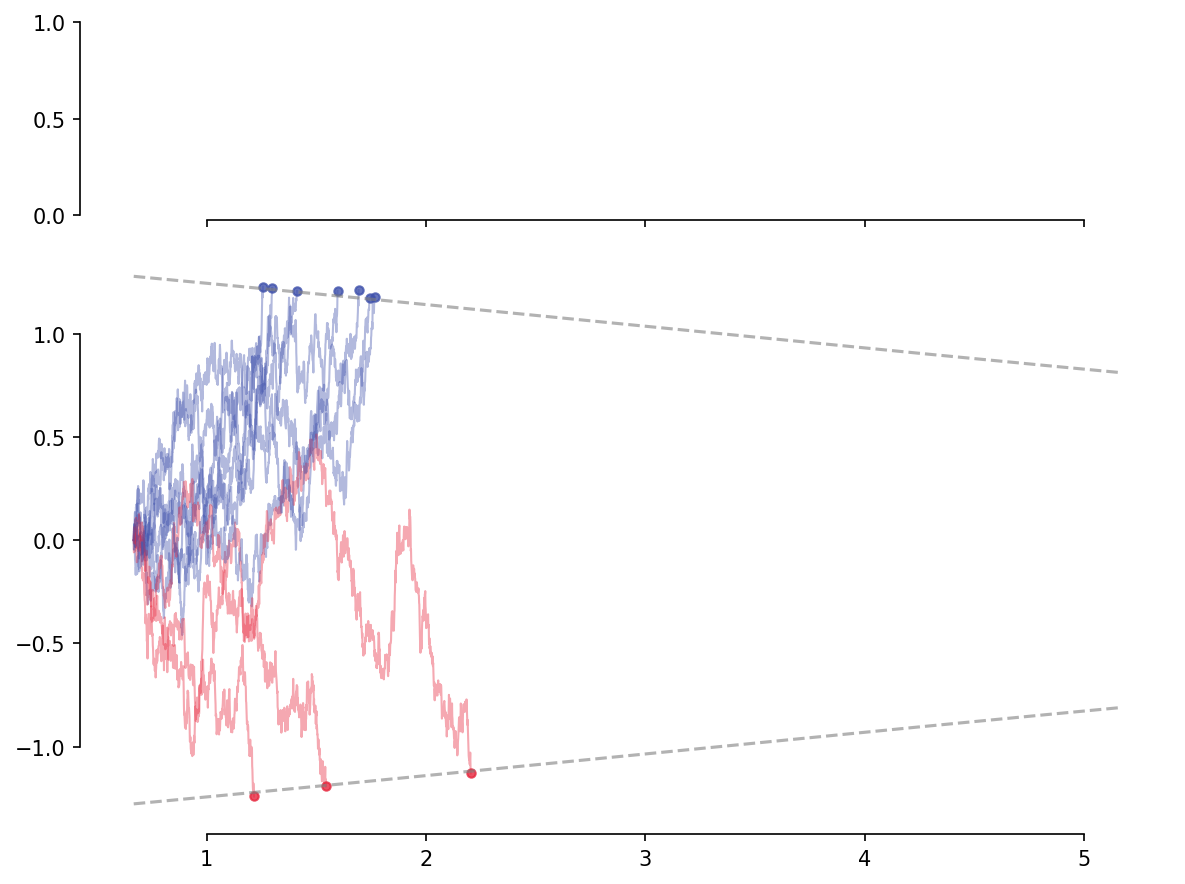

In [323]:
model_params = pd.read_csv("model_fit_results/left_turn_model/subj_all_robust_bic.csv")
all_subj_params = model_params[model_params.subj_id=="all"].to_dict("records")[0]
all_subj_params["lambda"] = 0.9
simulation_params = {"dt": 0.001, "duration": 4.5}

# time_grid = np.arange(0, simulation_params["duration"], simulation_params["dt"])
condition = {"tta": 6, "d": 20, "tta_or": 6}

plot_model_traces(condition, all_subj_params, simulation_params, get_gaze_sample(simulation_params), generate_new=True, n=10)

Done
- change lambda from 0 to 1, run 100 simulations for each, see how p_accept changes for this specific gaze sample
- mark the "baseline" probability from the data on this plot, this will give an indication of the reasonable real value
- see if this lambda value is the same for different conditions
- Come up with a way of including gaze data in a pyddm-fittable model
    - One (hacky) option would be to include a fixed, continuous gaze sample to mimic partial sampling.
    - Including the lambda parameter should then be as easy as sampling_rate(t) = gaze_sample(t) + lambda\*(1-gaze_sample(t)) for 0<=gaze_sample(t)<=1
        - Or, alternatively, sampling_rate(t) = lambda*1 + (1-lambda)\*gaze_sample(t)
    - Then, for any lambda
       - For gaze_sample = 1, this leads to sampling_rate = 1
       - For gaze_sample = 0, this leads to sampling_rate = lambda
    - And for any gaze_sample
       - For lambda = 0 (no sampling if not looking), this leads to sampling_rate = gaze_sample (either continuous or discrete)
       - For lambda = 1 (sample 100% even if not looking), this leads to sampling_rate = 1

TODOs
- include fixed gaze sample in the pyddm model
    - because of limited sample, not enough evidence is getting into the model with the parameters fitted to $\lambda=1$ - this has to be compensated by other changes in the parameters, probably higher alpha. To fix this, we need to include lambda when fitting.
    - Dig up how I tried to add non-constant conditions in the second left-turn experiment - this didn't quite work, probably makes sense to do it differently
    - In general case, the duration of a gaze sample is not guaranteed to be the same as T_dur
        - For now, assume the duration is T_dur, figure out how to generalize later
    - Check whether the fit of the model for gaze_sample = 1 is the same as
    - Check if fits of this model is better than the model without gaze dependency
    - If they are better, check how much the parameters of the gaze-dependent model differ from the original model
    - time the fitting of the present model, then also time the fitting of the model based on gaze
- calculate the realistic gaze sample (can be done later on)
    - check Merijn's matlab scripts to extract average gaze over all conditions. The crude approximation is that it's similar across all conditions
    - but also extract this per condition to compare in an overlay plot
- Once lambda is fitted using the model based on fixed gaze sample: run Monte-Carlo model simulation for an arbitrary set of gaze samples
    - Use this to simulate model output to the exact input in the experiment (for each experiment trial - one model output)
    - Check how variable this simulation is. My guess is that variance will be small-ish due to high number of trials
    - If indeed the variance is small, add a "model output" dataframe to the exp_measures, then we can easily analyze the relation between dwell_time and decision/RT in both model and data
- Even before (or while) we implement fitting of lambda in pyddm, we can still investigate how gaze affects behavior in the current implementation of the model
- then check the effect of gaze sample. How to properly vary it?
- One of indicators of the practical relevance of accounting for gaze might be the fitted value of the lambda parameter. Probably the value will be quite high, meaning that even if we don't look at a certain location, we still integrate most of the evidence coming from it. This however is a huge simplification of the model, because it averages out the discounting, while in real life discounting depends on how much information has been sampled so far - if for the first 1 second I don't look at the mirror, I supposedly don't sample any info from it



In [365]:
n = 1000

measures = pd.read_csv("measures.csv")

model_params = pd.read_csv("model_fit_results/left_turn_model/subj_all_robust_bic.csv")
all_subj_params = model_params[model_params.subj_id=="all"].to_dict("records")[0]
simulation_params = {"dt": 0.001, "duration": 4.5}
t = np.arange(0, simulation_params["duration"], simulation_params["dt"])
lambdas = np.linspace(0, 1, 11)

def get_p_accept(l, condition, simulation_params, all_subj_params, n):
    all_subj_params["lambda"] = l
    # t, dt, condition, model_params, gaze_sample, save_csv=True, n=3
    trials = generate_model_traces(t, simulation_params["dt"], condition, all_subj_params, get_gaze_sample(simulation_params),
                                   save_csv=False, n=n)
    decisions = [get_decision(trial) for trial in trials]
    return sum(decisions) / n

In [375]:
condition = {"tta": 6, "d": 40, "tta_or": 4}
p_accept = [get_p_accept(l, condition, simulation_params, all_subj_params, n) for l in lambdas]
p_accept_exp = measures[(measures.d_condition==condition["d"])
                        & (measures.tta_condition==condition["tta"])
                        & (measures.tta_or_condition==condition["tta_or"])].is_gap_accepted.mean()

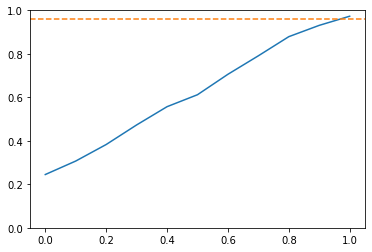

In [376]:
fig, ax = plt.subplots()
ax.set_ylim((0,1))
ax.plot(lambdas, p_accept)
ax.axhline(p_accept_exp, color="C1", ls="--")